# Wellesley College, Physics 202 Lab
### Fall 2016

### Lauri Wardell and Jerome Fung

Now that you've gotten Jupyter set up and running, and you've seen how you can use Jupyter as a calculator, we can turn our attention to some bigger tasks. In this notebook, you will learn:

* What Numpy arrays are, why they are useful, and how to use them
* How to write *functions* and use Numpy arrays in them
* How to make plots using `matplotlib`

# Numpy Arrays

Data structures that consist of an ordered arrangement of values can be useful in many physical contexts. Here are just a few examples:

* You're trying to determine the spring constant of a spring by measuring the stretch of the spring as you hang weights of increasing mass. (You'd like to keep your measured set of stretch distances together, and the order of the distances matters.)
* You're calculating the trajectory of a particle acted upon by some complicated force and want to know the particle positions at regular time intervals.

Python has a built-in `list` object, but the numpy `array` object has a number of features that make it preferable for most computational work. We'll soon see what some of those features are, but first we need the `import` statements that allow us to use numpy, scipy, and matplotlib.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# we'll use the following parts of the scipy library for curve fitting
# include now even though we won't use it in this notebook
import scipy.stats
import scipy.optimize

%matplotlib inline

Let's begin by creating an array. In the next code cell, I *assign* the variable `wendy` to a *1-dimensional* array that I create "by hand."

In [2]:
wendy = np.array([1, 1, 2, 3, 5, 8, 13])

Assignment means that I can subsequently use the variable name `wendy` and act on the entire array object. For instance,

In [3]:
print(wendy)

[ 1  1  2  3  5  8 13]


prints the array. What is powerful is the ability to perform mathematical operations on the **entire array at once**. Doing so makes for code that is easier to read and usually more efficient. For example, try some of the following for yourself:

In [4]:
print(wendy + 3)
print(2 * wendy)

[ 4  4  5  6  8 11 16]
[ 2  2  4  6 10 16 26]


(If you're familiar with Python `list` objects, you probably know that doing the same thing on a list requires explicit iteration over the list elements. Don't worry if you haven't worked with `list` objects before and the previous sentence was gobbledegook.)

I can create other arrays in a similar fashion and perform operations with multiple arrays:

In [6]:
winona = np.array([1, 1, 1, 1, 1, 1, 1])
xena = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# we can also use Jupyter in a calculator-like manner with arrays
wendy + winona

array([ 2,  2,  3,  4,  6,  9, 14])

However, trying to perform operations on arrays that are not the same shape results in an exception (`wendy` has 7 elements whereas `xena` has 8):

In [7]:
wendy + xena

ValueError: operands could not be broadcast together with shapes (7,) (8,) 

You can access specific elements of an array via *indexing* techniques. Here are some examples:

In [9]:
print(wendy[0]) # indices begin at 0
print(wendy[2]) # therefore this is actually the 3rd element of the array

1
2


In [10]:
print(wendy[0:5]) # a range of indices, doesn't include the endpoint wendy[5]

[1 1 2 3 5]


In [11]:
print(wendy[-1]) # last element

13


There are lots of other tricks available -- see the [official documentation on indexing here](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html) and/or a much more extensive tutorial [here](http://www.scipy-lectures.org/intro/numpy/array_object.html) if you are interested.

Arrays also have useful *methods*, which you can think of as operations that an array can perform on itself. The examples below show several possibilities as well as how to *call* a method:

In [14]:
# add up all the elements
wendy.sum()

33

In [16]:
print(wendy.min(), wendy.max()) # get minimum and maximum values

1 13


***Exercise 2***

Using the array `wendy` defined above, calculate the following by performing mathematical operations on `wendy`:

$$\frac{\textrm{wendy}^2 + 7}{\textrm{sum of elements in wendy}}$$

# Writing functions

We now turn to writing `functions`. You have already used a number of Python functions, like `print`, as well as functions that are part of numpy such as `np.array`. Functions provide a useful way to *encapsulate* calculations that you might want to reuse. Writing functions will also be necessary when you turn to the problem of fitting models to data.

The writing of functions is best illustrated through an example. The next code cell contains a rather silly example, but we'll use it to point out the important features.

In [18]:
def sum_squares_of_elements(x):
    '''
    Add up the squares of each element of an input array x.
    '''
    # The next line makes x an array if it isn't one already.
    x = np.asarray(x) 
    elements_squared = x**2
    sum_of_elements_squared = elements_squared.sum()
    return sum_of_elements_squared

Here are some features to notice:

* The `def` statement. Function definitions must begin with `def`. The name of the function, in this case `sum_squares_of_elements`, follows.
* Functions may have one or more *arguments*. A function may have no arguments, but most of the ones you'll use and write in this course will have at least one. In this example, `x` is the single argument.
* The `def` statement ends with a colon. Python is sensitive to indentation; subsequent lines are indented (by convention 4 spaces; Jupyter will do this for you automatically) and are part of the function.
* A comment string (delineated by three apostrophes) called a *documentation string* or *docstring* follows the `def` statement. This is optional, but it can be helpful for documenting what the function does. (Choosing sensible names can also be helpful, which is partly why I didn't give the function a meaningless name like `qwerty17`.)
* The code that the function will execute on its input arguments follows.
* Usually, the results of a function are meant to be used, and you will want a function to `return` one or more arguments. A function is not required to return anything, and you can also return multiple arguments. What you return is arbitrary: in particular, you can return numbers as well as arrays.

Now that the function is defined, I can use it by *calling* it. For example:

In [20]:
sum_squares_of_elements(wendy)

273

In [21]:
# Because of the np.asarray function, the function will work even if the input isn't an array
sum_squares_of_elements(2)

4

In [25]:
# can call functions within other functions
def sum_squares_of_elements_plus_n(x, n):
    '''
    Add a number n to the result of sum_squares_of_elements
    '''
    # for really simple things, calculations can happen within the return statement
    return sum_squares_of_elements(x) + n

In [26]:
sum_squares_of_elements_plus_n(wendy, 3)

276

So far, the functions in these examples use only mandatory, positional arguments. You will also encounter (but less frequently write) functions with optional *keyword arguments* that have a default value:

In [27]:
def sum_squares_of_elements_plus_n_with_kwarg(x, n = 1):
    return sum_squares_of_elements(x) + n

# if called with a single argument, the second argument n is supplied by default
print(sum_squares_of_elements_plus_n_with_kwarg(wendy))

# or can be called with a second argument, either by position or by explicit keyword
print(sum_squares_of_elements_plus_n_with_kwarg(wendy, 3))
print(sum_squares_of_elements_plus_n_with_kwarg(wendy, n = 3)) # does the same thing

274
276
276


***Exercise 3***

Write a function that takes as input a numpy array and a second parameter, `tau`, that returns an array where each element in the output contains the calculation
$$ e^{-x / \tau} $$
for the corresponding value $x$ in the input array.

# Plotting

We will now turn to making basic plots. We point out a few key features here, but there is much more you can learn from reading the [matplotlib documentation](http://matplotlib.org/api/pyplot_summary.html).

Let's start off with an example.

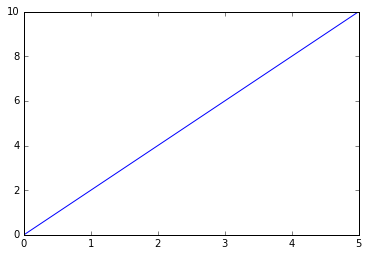

In [31]:
foo = np.array([0, 1, 2, 3, 4, 5])
foo_times_two = 2. * foo

plt.plot(foo, foo_times_two)

The basic plotting command is `plt.plot()`. In the above example, there were two arguments to `plt.plot()`:

* First argument: the variable to be plotted on the $x$ axis
* Second argument: the variable to be plotted on the $y$ axis

If no other arguments are given, the points are joined by continuous line segments. This may not always be desirable, and the behavior can be changed by an optional third argument:

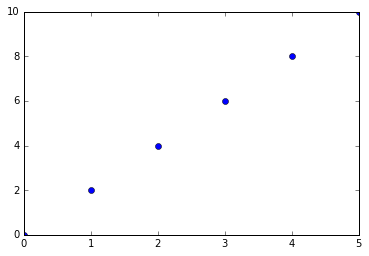

In [32]:
plt.plot(foo, foo_times_two, 'bo')

Here, the `'bo'` format argument gives blue circles. The 'b' stands for blue, and the 'o' gives circles. 

Other colors are available, including [g]reen, [r]ed, [c]yan, [y]ellow, [m]agenta, and blac[k]. 

A full list of plotting markers is available [here](http://matplotlib.org/api/markers_api.html). Commonly used ones include `V`, `^`, `<`, `>` (triangles facing in different directions), `.` (small points), and `s` (squares).

Try some formatting options of your own in the above plot!

There are some other niceties that you might want to include. A few examples are illustrated in the cell below:

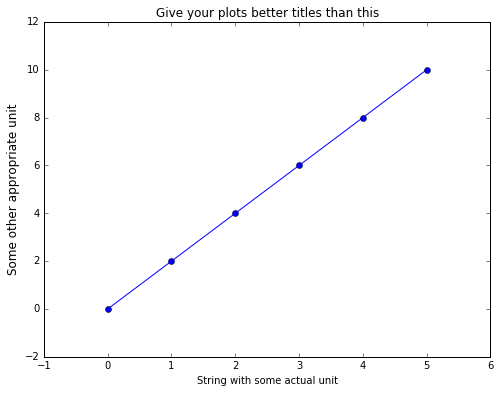

In [43]:
plt.figure(figsize=(8,6)) # make plots larger (nominal size in inches)
# actual on-screen size may vary depending on your computer browser
plt.plot(foo, foo_times_two, 'bo-') # include continuous lines between points
plt.xlim((-1, 6)) # change x-axis limits
plt.ylim((-2, 12)) # change y-axis limits
plt.xlabel('String with some actual unit') # label the x-axis
plt.ylabel('Some other appropriate unit', size=12) # label the y-axis
# keyword argument above increases the font size to 12 pt
plt.title('Give your plots better titles than this') # title

Other types of plots are possible, including:

* semilog plots (use `plt.semilogx` for logarithmic scaling on the $x$ axis and `plt.semilogy` for logarithmic scaling on the $y$ axis)
* log-log plots (`plt.loglog`)

Again, see the matplotlib documentation for the many other possibilities.

## Two useful commands for plotting mathematical functions

Very often you'll want to plot some mathematical function (either a built-in function or one you've written) over some range of arguments. You might, for instance, want to generate an evenly spaced set of points between two values. There is a nice way to do this:

In [44]:
# np.linspace takes 3 arguments: start, stop (inclusive), number of points
np.linspace(1, 5, 10)

array([ 1.        ,  1.44444444,  1.88888889,  2.33333333,  2.77777778,
        3.22222222,  3.66666667,  4.11111111,  4.55555556,  5.        ])

There's another way to do this: the function np.arange:

In [46]:
# np.arange takes 3 arguments: start, stop (not inclusive)
# and an optional 3rd argument that is the step size.
# If step size not included, default step size is 1
np.arange(1, 5, 0.2)

array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,
        3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8])

***Exercise 4***

Make a graph that plots the $\textrm{sinc}$ function, defined such that

$$\textrm{sinc}\, x = \frac{\sin x}{x} \  \ \ \ \ (x\ne 0) $$

$$\textrm{sinc}\, x = 1 \ \ \ \ \  (x = 0) $$

(This function arises in the formal theory of diffraction by a rectangular slit.) Plot $\textrm{sinc}\,x$ between -10 and 10. 

Hint: the $\textrm{sinc}$ function has already been defined in numpy as `np.sinc`.

***Exercise 5***

This exercise is the culmination of the things you've learned so far.

1. Take the function you wrote in Exercise 3. Plot it on a linear scale for some reasonable range of values of $x$ for $\tau = 1$.
2. On the same axes, plot the same function for several different values of $\tau$. (You can issue multiple `plt.plot` commands within the same cell.)

Two extensions if you have time:

3. Try making the same plots on semi-log scale that's logarithmic in $y$. What do your graphs look like, and does this make sense?
4. Look up the plt.legend function (use the built-in help or Google it) and use it to create a legend on one or both of your graphs.